In [1]:
"""Process results from 230218."""
import os
import argparse
import sys
sys.path.append('..')
from bayescmd.results_handling import kde_plot
from bayescmd.results_handling import scatter_dist_plot
from bayescmd.results_handling import data_import
from bayescmd.results_handling import plot_repeated_outputs
from bayescmd.results_handling import histogram_plot
from bayescmd.results_handling import data_merge_by_batch
from bayescmd.abc import import_actual_data
from bayescmd.abc import priors_creator
from bayescmd.util import findBaseDir
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image
from io import BytesIO
mpl.rc('figure', dpi=400)
from distutils import dir_util

def TIFF_exporter(fig, fname, fig_dir = '.', extra_artists=()):
    """
    Parameters
    ----------
    fig: matplotlib figure
    """
    
    # save figure
    # (1) save the image in memory in PNG format
    png1 = BytesIO()
    fig.savefig(png1, format='png', bbox_extra_artists=extra_artists)

    # (2) load this image into PIL
    png2 = Image.open(png1)

    # (3) save as TIFF
    png2.save(os.path.join(fig_dir,'{}.tiff'.format(fname)))
    png1.close()
    return True
BASEDIR = os.path.abspath(findBaseDir('BayesCMD'))


parent_dir = "/home/buck06191/Dropbox/phd/PLOS_paper/data/parameters/hypoxia/healthy/wide_params/inflection_SA/"
conf = "../examples/configuration_files/healthy_hypoxia_config.json"
pfile = os.path.abspath(os.path.join(parent_dir, 'posterior_parameters.csv'))# 'reduced_sorted_parameters.csv'))

with open(conf, 'r') as conf_f:
    conf = json.load(conf_f)
# params = priors_creator(conf['priors']['defaults'],
#                         conf['priors']['variation'])
params = conf['priors']

input_path = os.path.join(BASEDIR,
                          'PLOS_paper',
                          'data',
                          'hypoxia_output.csv')

d0 = import_actual_data(input_path)

targets = conf['targets']
model_name = conf['model_name']
inputs = conf['inputs']

config = {
    "model_name": model_name,
    "targets": targets,
    "inputs": inputs,
    "parameters": params,
    "input_path": input_path,
    "zero_flag": conf['zero_flag']
}

results = data_import(pfile)

true_medians= {'P_v': 4.0,
 'R_auto': 1.5,
 'Xtot': 9.1,
 'mu_max': 1.0,
 'n_h': 2.5,
 'n_m': 1.83,
 'phi': 0.036,
 'r_m': 0.027,
 'r_t': 0.018,
 'sigma_coll': 62.79}

# print(results.columns)


# Set accepted limit, lim
lim = 1000
# tols = [0.11]
d = "NRMSE"
figs = []


# TODO: Fix issue with plot formatting, cutting off axes etc
# TODO: Fix issue with time series cutting short.



DTW C variant not available.

If you want to use the C libraries (not required, depends on cython), then run `cd /home/buck06191/repos/Github/BayesCMD/bayescmd/abc/dtaidistance/..;python3 setup.py build_ext --inplace`.


STARTING AT: /home/buck06191/repos/Github/BayesCMD/bayescmd
 Looking for: BayesCMD
STARTING AT: /home/buck06191/repos/Github/BayesCMD/bayescmd
 Looking for: BayesCMD
STARTING AT: /home/buck06191/repos/Github/BayesCMD/bayescmd
 Looking for: BayesCMD
STARTING AT: /home/buck06191/repos/Github/BayesCMD/bayescmd
 Looking for: BayesCMD
Number of lines:	1661
Number of NaN values:	0


../bayescmd/results_handling.py:1125: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  times = true_data['t'].as_matrix()
../bayescmd/results_handling.py:1140: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  posteriors = sorted_df.iloc[:accepted_limit][p_names].as_matrix()
/home/buck06191/virtualenvs/bayescmd/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


NameError: name 'figPath' is not defined

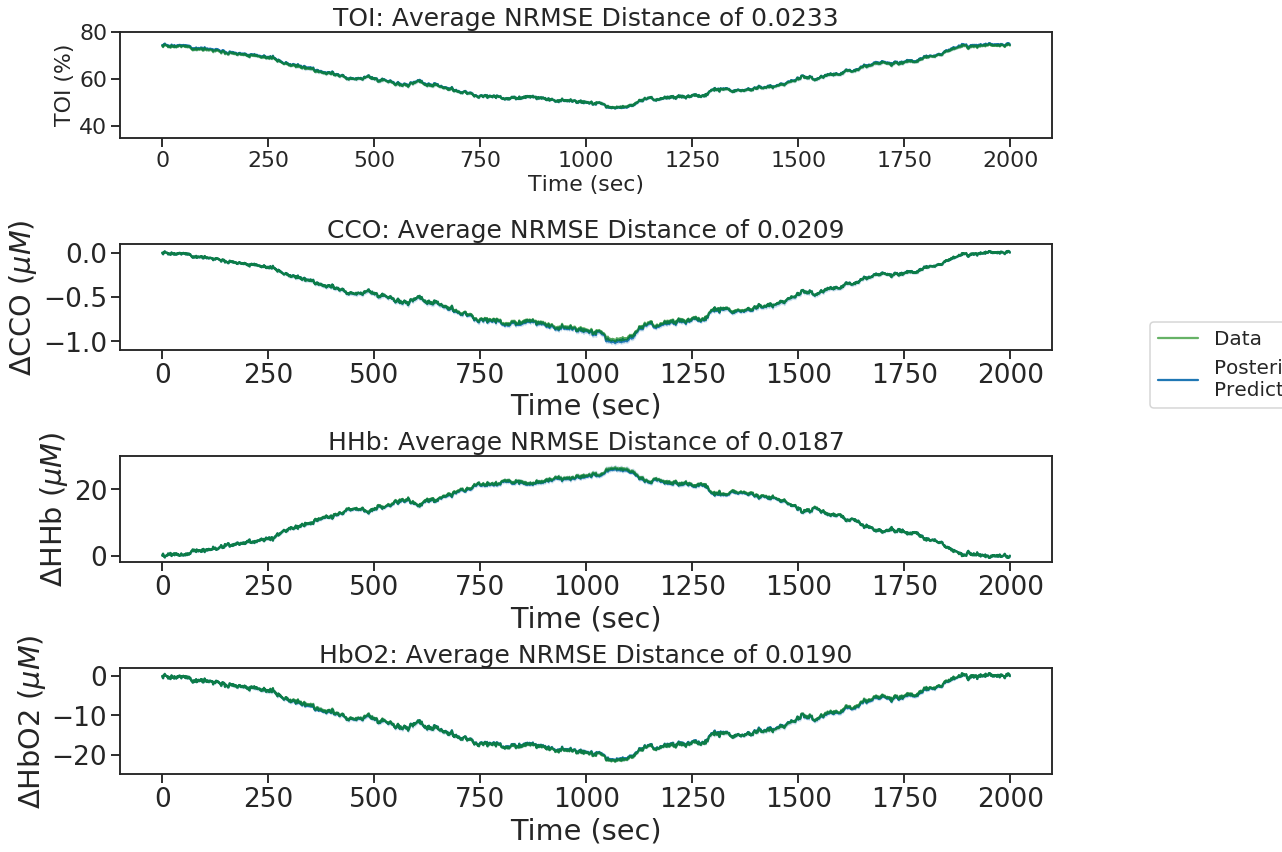

In [2]:
fig, ax = plot_repeated_outputs(results, n_repeats=25, limit=lim,
                            distance=d, **config)

for i, label in enumerate(["{} (%)", "$\Delta${} ($\mu M$)", "$\Delta${} ($\mu M$)", "$\Delta${} ($\mu M$)"]):
    ax[i].set_ylabel(label.format(ax[i].get_ylabel()))
    

for i, y_lim in enumerate([(35,80), (-1.1, 0.1), (-2, 30), (-25, 2)]):
    ax[i].set_ylim(y_lim)
fig.set_size_inches(18.5, 12.5)

figs.append(fig)

TIFF_exporter(fig, 'PLOS_healthy_{}_{}_TS'.format(str(lim).replace('.', '_'), d), fig_dir=figPath)

In [3]:
for i, y_lim in enumerate([(35,80), (-1.1, 0.1), (-2, 30), (-25, 2)]):
            ax[i].set_ylim(y_lim)

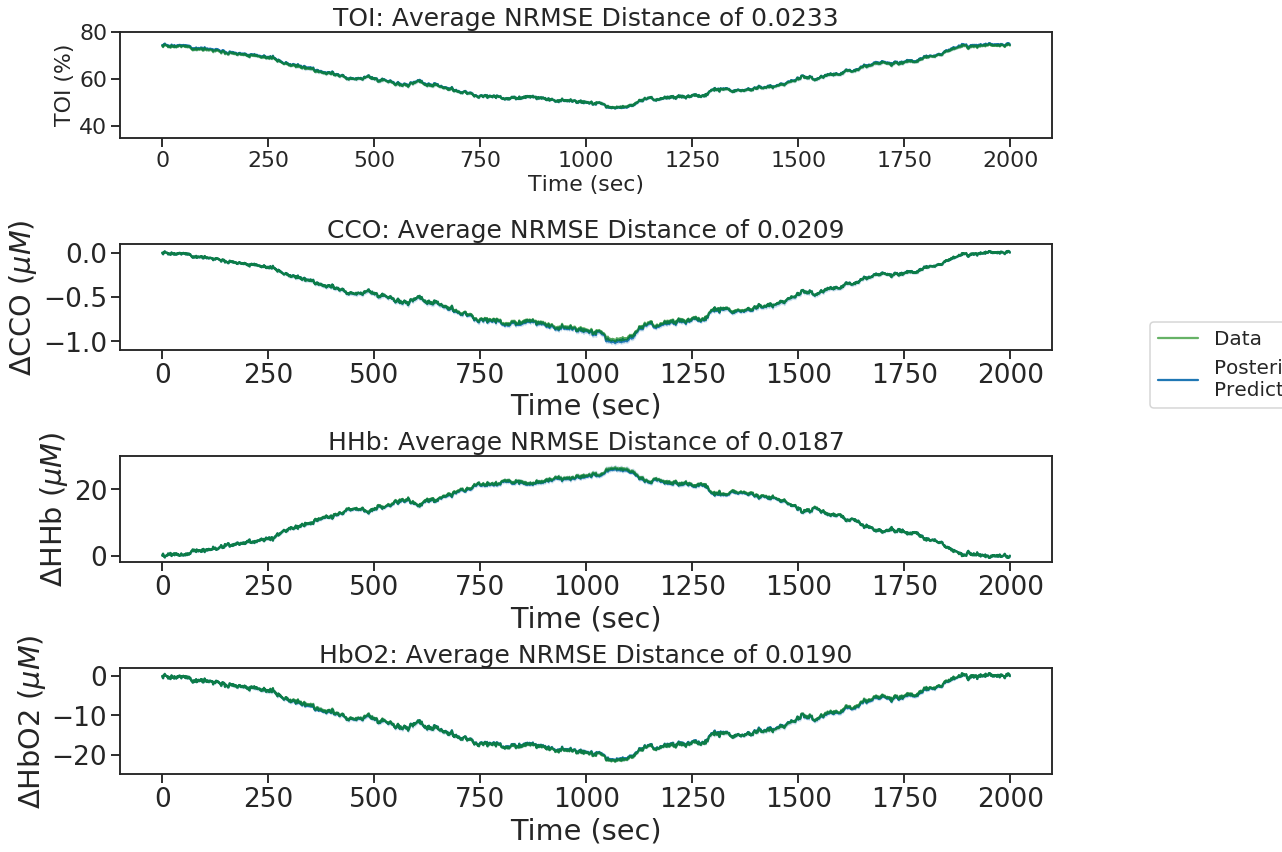

In [4]:
fig

In [5]:
figPath = "/home/buck06191/Dropbox/phd/Bayesian_fitting/{}/{}/{}/{}/{}/{}/{}/"\
            "Figures/{}".format(model_name, 'PLOS_paper', 'hypoxia',
                                'healthy', 'wide_range', 'limit', 'tolerance', d)

TIFF_exporter(fig, 'PLOS_healthy_{}_{}_TS'.format(str(lim).replace('.', '_'), d), fig_dir=figPath)

True

In [ ]:
for a in ax:
    a.set_xlim(1046,1048)
    a.set_xticks([1046.0, 1047.0, 1048.0])
ax[0].set_ylim(47.5, 49)
ax[1].set_ylim(-1.02, -0.9)
ax[2].set_ylim(25.4, 26.8)
ax[3].set_ylim(-22.2, -20.7)

In [ ]:
figPath = "/home/buck06191/Dropbox/phd/Bayesian_fitting/{}/{}/{}/{}/{}/{}/{}/"\
            "Figures/{}".format(model_name, 'PLOS_paper', 'hypoxia',
                                'healthy', 'wide_range', 'limit', 'tolerance', d)
TIFF_exporter(fig, 'PLOS_healthy_{}_{}_TS_zoom'.format(str(lim).replace('.', '_'), d), fig_dir=figPath)